# 주성분 분석(pca), iris

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [33]:
### 데이터 준비

In [34]:
from sklearn import datasets

iris = datasets.load_iris()

In [35]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
### 데이터 분리

In [39]:
X = df.drop(['target'], axis=1)
y = df['target']

In [40]:
### 테스트셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=2022)

print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [41]:
y_train.value_counts()

1    40
2    40
0    40
Name: target, dtype: int64

### 정규화
- 표준화

In [42]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.806667,0.803013,4.3,5.100,5.8,6.4,7.7
sepal width (cm),120.0,3.042500,0.442047,2.0,2.775,3.0,3.3,4.4
petal length (cm),120.0,3.716667,1.746898,1.0,1.575,4.2,5.1,6.9
petal width (cm),120.0,1.195833,0.770288,0.1,0.300,1.3,1.8,2.5


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #학습+데이터형 변형

X_train[:5]

array([[ 0.74198233, -0.32371562,  0.33532535,  0.13579779],
       [ 0.24176952, -1.91389762,  0.73771577,  0.39652954],
       [-0.00833688, -0.77805333,  0.10538797,  0.00543191],
       [ 1.11714194, -0.09654676,  0.85268446,  1.43945654],
       [-0.50854969,  1.94797295, -1.15926764, -1.03749509]])

### 차원축소

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)

X_train[:5]

array([[ 0.74724333, -0.0126806 ],
       [ 1.30073335, -1.63483243],
       [ 0.27281011, -0.72202793],
       [ 1.91391623,  0.46639386],
       [-2.05411407,  1.50098203]])

In [45]:
df = pd.DataFrame(X_train, columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,0.747243,-0.012681
1,1.300733,-1.634832
2,0.272810,-0.722028
3,1.913916,0.466394
4,-2.054114,1.500982


In [46]:
df['y_train'] = y_train.values
df.head()

,X_1,X_2,y_train
0,0.747243,-0.012681,1
1,1.300733,-1.634832,2
2,0.272810,-0.722028,1
3,1.913916,0.466394,2
4,-2.054114,1.500982,0


<AxesSubplot: xlabel='X_1', ylabel='X_2'>

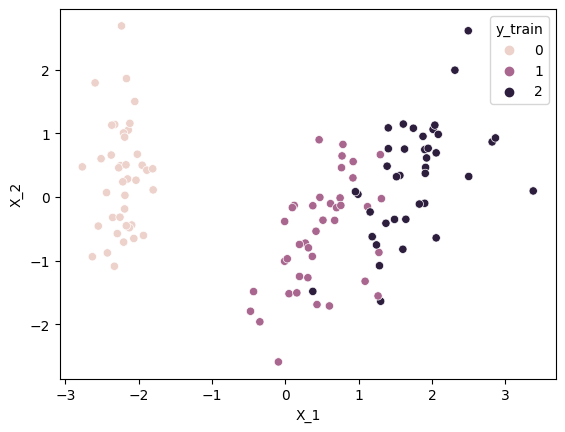

In [47]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_train')

In [48]:
df.head()

,X_1,X_2,y_train
0,0.747243,-0.012681,1
1,1.300733,-1.634832,2
2,0.272810,-0.722028,1
3,1.913916,0.466394,2
4,-2.054114,1.500982,0


### 분류 (결정트리)

In [52]:
df_X = df[['X_1', 'X_2']].values
df_y = df['y_train'].values

df_X[:5]

array([[ 0.74724333, -0.0126806 ],
       [ 1.30073335, -1.63483243],
       [ 0.27281011, -0.72202793],
       [ 1.91391623,  0.46639386],
       [-2.05411407,  1.50098203]])

In [53]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(df_X, df_y)

DecisionTreeClassifier(max_depth=3)

In [54]:
clf.score(df_X, df_y)

0.9416666666666667